In [1]:
import os
import shutil
import glob
import json
import random
import scipy.io as sio
import pandas as pd
import numpy as np
import re
import nibabel as nib
from nilearn.plotting import plot_stat_map
import pickle

/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-nvr-fmri/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
os.chdir('/Users/zeynepenkavi/Documents/RangelLab/NovelVsRepeated/fmri/analysis/01_level1/cluster_scripts')

In [3]:
subnum = '601'
session = '02'
task = 'binaryChoice'
runnum = '03'

data_path = '/Users/zeynepenkavi/Downloads/overtrained_decisions_bidsfmri'
mnum = 'model2'
out_path = '/Users/zeynepenkavi/Downloads/overtrained_decisions_bidsfmri/derivatives/nilearn/glm/level1/%s/%s'%(task, mnum)

Can you load in a pickled level 1 glm object and compute contrasts using it? Yes!

In [4]:
fn = os.path.join(out_path, 'sub-%s/ses-%s/sub-%s_ses-%s_task-%s_%s_level1_glm.pkl' %(subnum, session, subnum, session, task, mnum))
# f = open(fn, 'wb')
# pickle.dump(fmri_glm, f)
# f.close()

f = open(fn, 'rb')
fmri_glm = pickle.load(f)

f.close()


In [6]:
fmri_glm

FirstLevelModel(hrf_model='spm',
                mask_img=<nibabel.nifti1.Nifti1Image object at 0x10df59be0>,
                signal_scaling=True, smoothing_fwhm=5, subject_label='601',
                t_r=2.44994)

In [8]:
run_design_matrix = pd.read_csv(os.path.join(out_path, 'sub-%s/ses-%s/sub-%s_ses-%s_task-%s_run-%s_%s_level1_design_matrix.csv' %(subnum, session, subnum, session, task, runnum, mnum)))

In [9]:
run_design_matrix

,choiceCorrect_st,condition_ev,cross_ev,reward_ev,reward_par,stim_ev,valChosenPlusUnchosen_par,trans_x,trans_x_derivative1,trans_x_derivative1_power2,...,scrub,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,drift_7,drift_8,constant
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000623,0.000000,0.000000e+00,...,0.0,0.105405,0.105393,0.105373,0.105345,0.105309,0.105265,0.105213,0.105152,1.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015547,0.016170,2.614577e-04,...,0.0,0.105373,0.105265,0.105084,0.104832,0.104507,0.104111,0.103644,0.103106,1.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000140,-0.015688,2.460983e-04,...,0.0,0.105309,0.105008,0.104507,0.103808,0.102911,0.101818,0.100531,0.099052,1.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.017625,-0.017485,3.057105e-04,...,0.0,0.105213,0.104624,0.103644,0.102278,0.100531,0.098408,0.095918,0.093071,1.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.017579,0.000046,2.152960e-09,...,0.0,0.105084,0.104111,0.102497,0.100250,0.097385,0.093920,0.089876,0.085278,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.0,0.000000,0.292601,0.270791,3.338848,0.436607,-1.450109,0.083744,0.001937,3.750807e-06,...,0.0,-0.105084,0.104111,-0.102497,0.100250,-0.097385,0.093920,-0.089876,0.085278,1.0
176,0.0,0.000000,0.139074,0.328911,6.044869,0.532015,7.280852,0.083882,0.000138,1.909924e-08,...,0.0,-0.105213,0.104624,-0.103644,0.102278,-0.100531,0.098408,-0.095918,0.093071,1.0
177,0.0,0.000000,0.081329,0.338700,9.741295,0.579971,12.576969,0.083730,-0.000152,2.310400e-08,...,0.0,-0.105309,0.105008,-0.104507,0.103808,-0.102911,0.101818,-0.100531,0.099052,1.0
178,0.0,0.006167,0.091260,0.325335,6.633975,0.583404,-15.676551,0.090016,0.006287,3.952260e-05,...,0.0,-0.105373,0.105265,-0.105084,0.104832,-0.104507,0.104111,-0.103644,0.103106,1.0


In [11]:
from level1_utils import make_contrasts

In [12]:
contrasts = make_contrasts(run_design_matrix, mnum)

In [13]:
contrasts

{'choiceCorrect_st': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'condition_ev': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'cross_ev': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'reward_ev': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'reward_par': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [19]:
contrast_val = contrasts['valChosenPlusUnchosen_par']
output_type = 'z_score'
contrast_map = fmri_glm.compute_contrast(contrast_val, output_type= output_type)

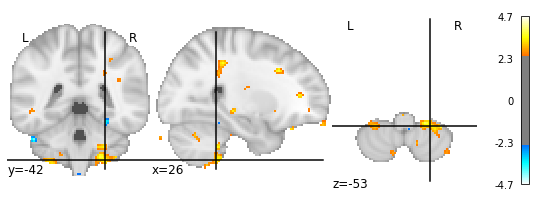

In [20]:
plot_stat_map(contrast_map, threshold=2.5)

Is there any other fit index info in the fmri glm object?

**NOT if ran and saved with `minimize_memory = True`**

```
ValueError: To access voxelwise attributes like R-squared, residuals, and predictions, the `FirstLevelModel`-object needs to store there attributes. To do so, set `minimize_memory` to `False` when initializing the `FirstLevelModel`-object.
```

In [26]:
fmri_glm.r_square

ValueError: To access voxelwise attributes like R-squared, residuals, and predictions, the `FirstLevelModel`-object needs to store there attributes. To do so, set `minimize_memory` to `False` when initializing the `FirstLevelModel`-object.

Can you refit a level 1 using a saved pkl object? Yes!

In [30]:
fmri_glm.set_params(minimize_memory=False)

FirstLevelModel(hrf_model='spm',
                mask_img=<nibabel.nifti1.Nifti1Image object at 0x10df59be0>,
                minimize_memory=False, signal_scaling=True, smoothing_fwhm=5,
                subject_label='601', t_r=2.44994)

In [32]:
fmri_img = glob.glob(os.path.join(data_path,"derivatives/sub-%s/ses-%s/func/sub-%s_ses-%s_task-%s_run-*_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"%(subnum, session, subnum, session, task)))

In [33]:
fmri_glm = fmri_glm.fit(fmri_img, design_matrices = run_design_matrix)

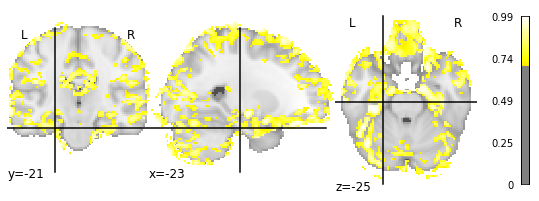

In [44]:
plot_stat_map(fmri_glm.r_square[0], threshold=.7)

In [46]:
fmri_glm.r_square[0].get_fdata().shape

(97, 115, 97, 1)

In [55]:
fmri_glm.predicted[0].get_fdata().shape

(97, 115, 97, 180)

In [56]:
np.hstack(([-1, -1, 1, 1], np.zeros(6)))

array([-1., -1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

View value regressor across sessiosns for one subject

In [ ]:
# reg = 'reward_par'
mnum = 'model2'
reg = 'valChosenPlusUnchosen_par' #model2
# mnum = 'model1'
# reg = 'valChosenMinusUnchosen_par' #model1

In [ ]:
from nilearn.plotting import view_img

In [ ]:
session = '01'
contrasts_path = os.path.join(out_path, "sub-%s/ses-%s/contrasts"%(subnum, session))
cmap = os.path.join(contrasts_path, 'sub-%s_ses-%s_task-%s_%s_%s_tmap.nii.gz'%(subnum, session, task, mnum, reg))
view_img(cmap, threshold=2.3, title = "ses-%s %s"%(session, reg))

In [ ]:
session = '02'
contrasts_path = os.path.join(out_path, "sub-%s/ses-%s/contrasts"%(subnum, session))
cmap = os.path.join(contrasts_path, 'sub-%s_ses-%s_task-%s_%s_%s_tmap.nii.gz'%(subnum, session, task, mnum, reg))
view_img(cmap, threshold=2.3, title = "ses-%s %s"%(session, reg))

In [ ]:
session = '03'
contrasts_path = os.path.join(out_path, "sub-%s/ses-%s/contrasts"%(subnum, session))
cmap = os.path.join(contrasts_path, 'sub-%s_ses-%s_task-%s_%s_%s_tmap.nii.gz'%(subnum, session, task, mnum, reg))
view_img(cmap, threshold=2.3, title = "ses-%s %s"%(session, reg))